In [2]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV

In [3]:
# Load the dataset
df = pd.read_csv('/Users/pragunisanotra/Documents/LearnTrackAI/notebook/data/stud.csv')


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Preparing X and Y variables
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [6]:
# Display unique categories in categorical variables
print("Categories in 'gender' variable: ", df['gender'].unique())
print("Categories in 'race_ethnicity' variable: ", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable: ", df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable: ", df['lunch'].unique())
print("Categories in 'test_preparation_course' variable: ", df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [7]:
# Create Column Transformer with 2 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

X = preprocessor.fit_transform(X)

# Separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [8]:
# Train models and evaluate performance
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3242
- Mean Absolute Error: 4.2682
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4016
- Mean Absolute Error: 4.2186
- R2 Score: 0.8801


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7172
- Mean Absolute Error: 4.5270
- R2 Score: 0.8550
-----------------------

In [9]:
# Display results
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by="R2_Score", ascending=False)
print(results)

                Model Name  R2_Score
2                    Ridge  0.880593
0        Linear Regression  0.880095
5  Random Forest Regressor  0.856760
6       AdaBoost Regressor  0.851064
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.783681
4            Decision Tree  0.727129


In [10]:
# Linear Regression model for final predictions
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

In [11]:
# Calculate accuracy
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f%%" % score)

Accuracy of the model is 88.01%


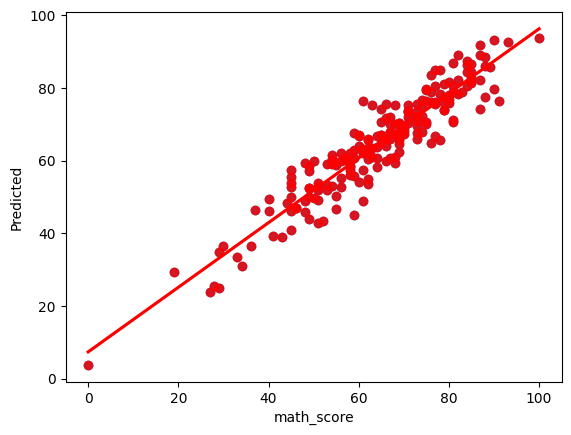

In [12]:
# Plot y_pred vs y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()

In [13]:
# Difference between Actual and Predicted Values
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
print(pred_df)

     Actual Value  Predicted Value  Difference
521            91        76.492188   14.507812
737            53        58.976562   -5.976562
740            80        76.890625    3.109375
660            74        76.742188   -2.742188
411            84        87.500000   -3.500000
..            ...              ...         ...
408            52        43.500000    8.500000
332            62        62.023438   -0.023438
208            74        67.992188    6.007812
613            65        67.125000   -2.125000
78             61        62.445312   -1.445312

[200 rows x 3 columns]
